# Team 5: Fall Cmp 274

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/274/2019-Dec.csv")

In [ ]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


In [ ]:
%load_ext rpy2.ipython

## 1. Abstract and Business Objective 
The main objective of this analysis revolves around identifying key insights across each sector of the funneling process from viewing a product, adding / removing to/from cart, to making a purchase so as to optimize conversion rates by providing critical recommendations and performance improvements. This is inclusive of uncovering business intelligence, associated recommendations on performance improvements and machine learning techniques to support the same using R.

## 2. Data Preprocessing¶
The dataset did not contain any missing values. Outlier analysis revealed nominal negative price irregularities in the Price attribute, this is assumed to be caused due to human error and are dropped. Price attribute is also assumed to be the selling price of the product. The Time attribute was extracted to Date and Time. Looking into the structure of the data, revealed some irregularities with Category code and Brand. Since more than 50% of these observations were not labelled, I have chosen not to include these two attributes in the analysis.

In [ ]:
%%R

#install the necessary library 
install.packages("hms")
install.packages("gridExtra")
install.packages("lubridate")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/hms_1.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 43117 bytes (42 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

In [ ]:
%%R
#read the data 
data_2019_dec <- read.csv("/content/drive/My Drive/274/2019-Dec.csv")
data_2019_nov <- read.csv("/content/drive/My Drive/274/2019-Nov.csv")
data_2019_oct <- read.csv("/content/drive/My Drive/274/2019-Oct.csv")
data_2020_feb <- read.csv("/content/drive/My Drive/274/2020-Feb.csv")
data_2020_jan <- read.csv("/content/drive/My Drive/274/2020-Jan.csv")

R[write to console]: Error in file(file, "rt") : cannot open the connection

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(file, "rt") :
R[write to console]: 
 
R[write to console]:  cannot open file '/content/drive/My Drive/274/2019-Dec.csv': No such file or directory




Error in file(file, "rt") : cannot open the connection


RInterpreterError: ignored

In [ ]:
%%R
str(data_2019_oct)
cat("\n")
str(data_2019_nov)
cat("\n")
str(data_2019_dec)
cat("\n")
str(data_2020_jan)
cat("\n")
str(data_2020_feb)

'data.frame':	4102283 obs. of  9 variables:
 $ event_time   : chr  "2019-10-01 00:00:00 UTC" "2019-10-01 00:00:03 UTC" "2019-10-01 00:00:07 UTC" "2019-10-01 00:00:07 UTC" ...
 $ event_type   : chr  "cart" "cart" "cart" "cart" ...
 $ product_id   : int  5773203 5773353 5881589 5723490 5881449 5857269 5739055 5825598 5698989 5875317 ...
 $ category_id  : num  1.49e+18 1.49e+18 2.15e+18 1.49e+18 1.49e+18 ...
 $ category_code: chr  "" "" "" "" ...
 $ brand        : chr  "runail" "runail" "lovely" "runail" ...
 $ price        : num  2.62 2.62 13.48 2.62 0.56 ...
 $ user_id      : int  463240011 463240011 429681830 463240011 429681830 430174032 377667011 467916806 385985999 474232307 ...
 $ user_session : chr  "26dd6e6e-4dac-4778-8d2c-92e149dab885" "26dd6e6e-4dac-4778-8d2c-92e149dab885" "49e8d843-adf3-428b-a2c3-fe8bc6a307c9" "26dd6e6e-4dac-4778-8d2c-92e149dab885" ...

'data.frame':	4635837 obs. of  9 variables:
 $ event_time   : chr  "2019-11-01 00:00:02 UTC" "2019-11-01 00:00:09 UTC" "2019-

In [ ]:
%%R
#remove the unwanted columns and fixing outliers of negative prices 
sample_2019_oct <- data_2019_oct[c(-3,-4,-5,-9)]
s1 <- sum(sample_2019_oct$price<0)
sample_2019_oct <- sample_2019_oct[(sample_2019_oct$price>0),]
t1 <- nrow(sample_2019_oct)

sample_2019_nov <- data_2019_nov[c(-3,-4,-5,-9)]
s2 <- sum(sample_2019_nov$price<0)
sample_2019_nov <- sample_2019_nov[(sample_2019_nov$price>0),]
t2 <- nrow(sample_2019_nov)

sample_2019_dec <- data_2019_dec[c(-3,-4,-5,-9)]
s3 <- sum(sample_2019_dec$price<0)
sample_2019_dec <- sample_2019_dec[(sample_2019_dec$price>0),]
t3 <- nrow(sample_2019_dec)

sample_2020_jan <- data_2020_jan[c(-3,-4,-5,-9)]
s4 <- sum(sample_2020_jan$price<0)
sample_2020_jan <- sample_2020_jan[(sample_2020_jan$price>0),]
t4 <- nrow(sample_2020_jan)

sample_2020_feb <- data_2020_feb[c(-3,-4,-5,-9)]
s5 <- sum(sample_2020_feb$price<0)
sample_2020_feb <- sample_2020_feb[(sample_2020_feb$price>0),]
t5 <- nrow(sample_2020_feb)

In [ ]:
%%R
#the percentage of outliers in the combined dataset that was removed 
total_per_outliers_removed <- (sum(s1,s2,s3,s4,s5)/sum(t1,t2,t3,t4,t5)) * 100
total_per_outliers_removed

[1] 0.0006362759


In [ ]:
%%R
#remove unwanted attributed from workspace
rm(total_per_outliers_removed, t5,t4,t3,t2,t1,s1,s2,s3,s4,s5, data_2019_oct, data_2019_nov, data_2019_dec, data_2020_jan, data_2020_feb)

In [ ]:
%%R
#missing values detection if any

sapply(sample_2019_oct, function(x) sum(is.na(x)))
sapply(sample_2019_nov, function(x) sum(is.na(x)))
sapply(sample_2019_dec, function(x) sum(is.na(x)))
sapply(sample_2020_jan, function(x) sum(is.na(x)))
sapply(sample_2020_feb, function(x) sum(is.na(x)))

event_time event_type      brand      price    user_id 
         0          0          0          0          0 


In [ ]:
%%R
#date time split 

library(hms)

parsed1 <- strptime(sample_2019_oct$event_time, "%Y-%m-%d %H:%M:%S")
event_time<- format(parsed1,"%H:%M:%S")
event_date<- format(parsed1,"%Y-%m-%d")
sample_2019_oct$event_time<- as_hms(event_time)
sample_2019_oct$event_date<- as.Date(event_date)

parsed2 <- strptime(sample_2019_nov$event_time, "%Y-%m-%d %H:%M:%S")
event_time<- format(parsed2,"%H:%M:%S")
event_date<- format(parsed2,"%Y-%m-%d")
sample_2019_nov$event_time<- as_hms(event_time)
sample_2019_nov$event_date_ <- as.Date(event_date)

parsed3 <- strptime(sample_2019_dec$event_time, "%Y-%m-%d %H:%M:%S")
event_time<- format(parsed3,"%H:%M:%S")
event_date<- format(parsed3,"%Y-%m-%d")
sample_2019_dec$event_time <- as_hms(event_time)
sample_2019_dec$event_date <- as.Date(event_date)

parsed4 <- strptime(sample_2020_jan$event_time, "%Y-%m-%d %H:%M:%S")
event_time<- format(parsed4,"%H:%M:%S")
event_date<- format(parsed4,"%Y-%m-%d")
sample_2020_jan$event_time <- as_hms(event_time)
sample_2020_jan$event_date <- as.Date(event_date)

parsed5 <- strptime(sample_2020_feb$event_time, "%Y-%m-%d %H:%M:%S")
event_time<- format(parsed5,"%H:%M:%S")
event_date<- format(parsed5,"%Y-%m-%d")
sample_2020_feb$event_time <- as_hms(event_time)
sample_2020_feb$event_date <- as.Date(event_date)

In [ ]:
%%R
#check to see if it worked 
str(sample_2019_oct)
cat("\n")
str(sample_2019_nov)
cat("\n")
str(sample_2019_dec)
cat("\n")
str(sample_2020_jan)
cat("\n")
str(sample_2020_feb)

'data.frame':	4096197 obs. of  6 variables:
 $ event_time: 'hms' num  00:00:00 00:00:03 00:00:07 00:00:07 ...
  ..- attr(*, "units")= chr "secs"
 $ event_type: chr  "cart" "cart" "cart" "cart" ...
 $ brand     : chr  "runail" "runail" "lovely" "runail" ...
 $ price     : num  2.62 2.62 13.48 2.62 0.56 ...
 $ user_id   : int  463240011 463240011 429681830 463240011 429681830 430174032 377667011 467916806 385985999 474232307 ...
 $ event_date: Date, format: "2019-10-01" "2019-10-01" ...

'data.frame':	4624195 obs. of  6 variables:
 $ event_time : 'hms' num  00:00:02 00:00:09 00:00:10 00:00:11 ...
  ..- attr(*, "units")= chr "secs"
 $ event_type : chr  "view" "cart" "view" "cart" ...
 $ brand      : chr  "" "" "pnb" "jessnail" ...
 $ price      : num  0.32 2.38 22.22 3.16 3.33 ...
 $ user_id    : int  562076640 553329724 556138645 564506666 553329724 553329724 562076640 514649199 429913900 429913900 ...
 $ event_date_: Date, format: "2019-11-01" "2019-11-01" ...

'data.frame':	3525679 obs

In [ ]:
%%R
#remove unwanted attributes from workspace
rm(parsed1, parsed2, parsed3, parsed4, parsed5, event_time, event_date)

## 3. Business Insights and Recommendations

### 3.1. Investigating December fall

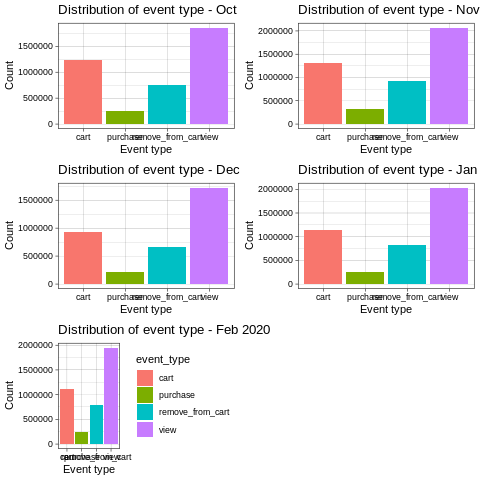

In [ ]:
%%R
#Distribution of event history across each month. 

library(ggplot2)
library(gridExtra)

options(repr.plot.width = 12, repr.plot.height = 10)
plot1 <- ggplot(data = sample_2019_oct) + geom_bar(mapping = aes(x = event_type, fill = event_type), show.legend = FALSE) + theme_linedraw() + ggtitle("Distribution of event type - Oct 2019") + xlab("Event type") + ylab("Count")
plot2 <- ggplot(data = sample_2019_nov) + geom_bar(mapping = aes(x = event_type, fill = event_type), show.legend = FALSE) + theme_linedraw() + ggtitle("Distribution of event type - Nov 2019") + xlab("Event type") + ylab("Count")
plot3 <- ggplot(data = sample_2019_dec) + geom_bar(mapping = aes(x = event_type, fill = event_type), show.legend = FALSE) + theme_linedraw() + ggtitle("Distribution of event type - Dec 2019") + xlab("Event type") + ylab("Count")
plot4 <- ggplot(data = sample_2020_jan) + geom_bar(mapping = aes(x = event_type, fill = event_type), show.legend = FALSE) + theme_linedraw() + ggtitle("Distribution of event type - Jan 2020") + xlab("Event type") + ylab("Count")
plot5 <- ggplot(data = sample_2020_feb) + geom_bar(mapping = aes(x = event_type, fill = event_type)) + theme_linedraw() + ggtitle("Distribution of event type - Feb 2020") + xlab("Event type") + ylab("Count")
grid.arrange(plot1,plot2,plot3,plot4,plot5)

In [ ]:
%%R
#remove unwanted attributes from the workspace
rm(plot1,plot2,plot3,plot4,plot5)

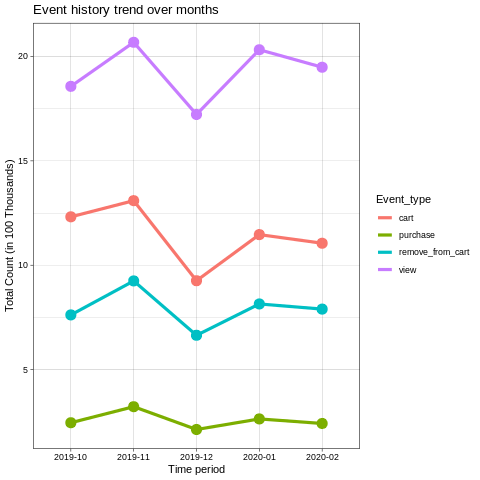

In [ ]:
%%R
#trend line for event history 

tab1 <- as.data.frame(table(sample_2019_oct$event_type))
names(tab1) <- c("Event_type", "Freq")
tab1$Month <- "2019-10"
tab2 <- as.data.frame(table(sample_2019_nov$event_type))
names(tab2) <- c("Event_type", "Freq")
tab2$Month <- "2019-11"
tab3 <- as.data.frame(table(sample_2019_dec$event_type))
names(tab3) <- c("Event_type", "Freq")
tab3$Month <- "2019-12"
tab4 <- as.data.frame(table(sample_2020_jan$event_type))
names(tab4) <- c("Event_type", "Freq")
tab4$Month <- "2020-01"
tab5 <- as.data.frame(table(sample_2020_feb$event_type))
names(tab5) <- c("Event_type", "Freq")
tab5$Month <- "2020-02"
trend <- rbind(tab1, tab2, tab3, tab4, tab5)

options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data = trend, mapping = aes(x = Month, y = Freq/100000)) + geom_line(mapping = aes(color = Event_type, group = Event_type), lwd = 1.5) + geom_point(mapping = aes(color = Event_type, size = 0.5), show.legend = FALSE) + theme_linedraw() + ggtitle("Event history trend over months") + xlab("Time period") + ylab("Total Count (in 100 Thousands)")

In [ ]:
%%R
#remove the unwanted attributes from the workspace 

rm(tab1,tab2,tab3,tab4,tab5)

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following object is masked from ‘package:hms’:

    hms


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::hms()         masks hms::hms()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()


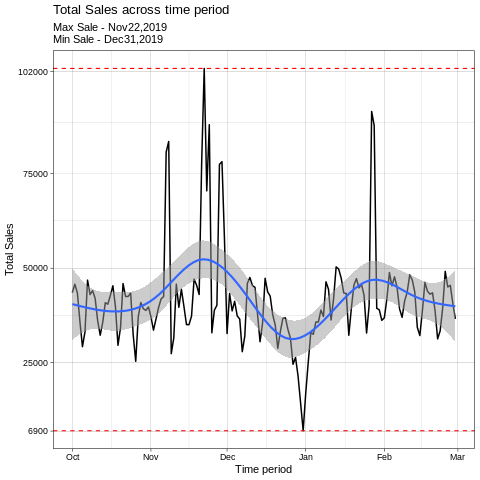

In [ ]:
%%R
#Daily sales 

#assuming selling price is same as price listed 

library(lubridate)
library(tidyverse)
library(dplyr)

s1 <- sample_2019_oct %>% filter(event_type == "purchase") %>% select(price, event_date)
s1 <- aggregate(price ~ event_date, s1, sum)
s2 <- sample_2019_nov %>% filter(event_type == "purchase") %>% select(price, event_date_)
s2 <- aggregate(price ~ event_date_, s2, sum)
names(s2) <- c("event_date", "price")
s3 <- sample_2019_dec %>% filter(event_type == "purchase") %>% select(price, event_date)
s3 <- aggregate(price ~ event_date, s3, sum)
s4 <- sample_2020_jan %>% filter(event_type == "purchase") %>% select(price, event_date)
s4 <- aggregate(price ~ event_date, s4, sum)
s5 <- sample_2020_feb %>% filter(event_type == "purchase") %>% select(price, event_date)
s5 <- aggregate(price ~ event_date, s5, sum)

sales <- rbind(s1,s2,s3,s4,s5)
sales$period <- month(sales$event_date)

sales[(sales$price == (max(sales$price))),]
sales[(sales$price == (min(sales$price))),]

options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(data = sales, mapping = aes(x = event_date, y = price)) + geom_line(lwd = 0.7) + geom_smooth(method = "gam", se = TRUE, alpha = 0.5) + scale_y_continuous(breaks = c(6900,25000,50000,75000,102000)) + geom_hline(mapping = aes(yintercept = min(price)), linetype = "dashed", color = "red") +  geom_hline(mapping = aes(yintercept = max(price)), linetype = "dashed", color = "red") +  xlab("Time period") + ylab("Total Sales") + theme_linedraw() + ggtitle("Total Sales across time period", subtitle = "Max Sale - Nov22,2019 \nMin Sale - Dec31,2019")

**Recommendation 1**: Offer tailor made marketing campaigns and offers via emails

In [ ]:
%%R
#remove unwanted attributes from the workspace 
rm(s1,s2,s3,s4,s5)

### 3.2. Impact of conversion and cart abandonment rate

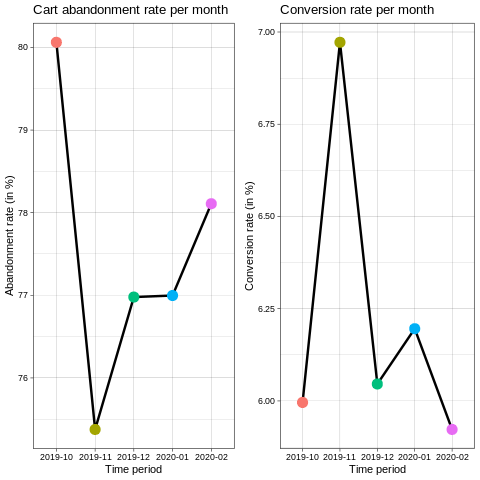

In [ ]:
%%R
#cart abandonment rate and conversion rate (conversion goal is purchases made)

cart <- trend %>% filter(Event_type == "cart")
purchase <- trend %>% filter(Event_type == "purchase")
removed <- trend %>% filter(Event_type == "remove_from_cart")
view <- trend %>% filter(Event_type == "view")

#cart abandonment rate 
ab_rate <- (1- (purchase$Freq/cart$Freq)) * 100 
#conversion rate for purchases made 
conv_rate <- (purchase$Freq/(view$Freq + cart$Freq + removed$Freq + purchase$Freq)) * 100 
month <- c("2019-10", "2019-11", "2019-12", "2020-01", "2020-02")
rate <- data.frame(ab_rate, conv_rate, month)
rate

options(repr.plot.width = 13, repr.plot.height = 5)
p1 <- ggplot(data = rate, mapping = aes(x = month)) + geom_line(mapping = aes(y = ab_rate, group = 1), lwd = 1.15) + geom_point(mapping = aes(y = ab_rate, color = month, size = 1), show.legend = FALSE) + theme_linedraw() +  ggtitle("Cart abandonment rate per month ") + xlab("Time period") + ylab("Abandonment rate (in %)")
options(repr.plot.width = 13, repr.plot.height = 5)
p2 <- ggplot(data = rate, mapping = aes(x = month)) + geom_line(mapping = aes(y = conv_rate, group = 1), lwd = 1.15) + geom_point(mapping = aes(y = conv_rate, color = month, size = 1), show.legend = FALSE) + theme_linedraw() +  ggtitle("Conversion rate per month ") + xlab("Time period") + ylab("Conversion rate (in %)")

grid.arrange(p1,p2, nrow = 1)

**Recommendation 2**: Introduce email marketing re-targeting of customers who abandoned the cart alongside offering promotional coupons of discount or other resources. To offer free shipping for total purchase crossing a threshold and to offer guest checkout functions with easy access to payment gateways.

### 3.3. Impact of power of retention based on loyal customers

In [ ]:
%%R
#remove unwanted attributes from the workspace 
rm(cart,purchase, view, removed, ab_rate, conv_rate, month, p1, p2)

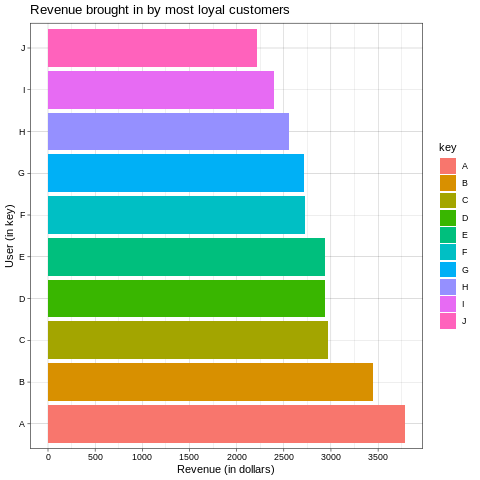

In [ ]:
%%R
#who has brought in highest revenue 

t1 <- sample_2019_oct %>% select(user_id, event_type, price)
t2 <- sample_2019_nov %>% select(user_id, event_type, price)
t3 <- sample_2019_dec %>% select(user_id, event_type, price)
t4 <- sample_2020_jan %>% select(user_id, event_type, price)
t5 <- sample_2020_feb %>% select(user_id, event_type, price)
t6 <- rbind(t1,t2,t3,t4,t5)

#remove unwanted attributes from the workspace 
rm(t1,t2,t3,t4,t5)

loyalty <- t6 %>% filter(event_type == "purchase") 
loyal <- aggregate(price ~ user_id, loyalty, sum)
loyal <- loyal[(loyal$price>0),] #remove the observations where prices are below 0; total 16
loyal <- loyal %>% arrange(desc(price)) 
top_10 <- head(loyal, 10)
top_10$key <- factor(c("A","B","C","D", "E", "F", "G", "H", "I", "J"))
top_10
worst_10 <- tail(loyal, 10)

options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data = top_10, mapping = aes(x = key, y = price)) + geom_bar(stat = "identity", mapping = aes(fill = key)) + coord_flip() +  scale_y_continuous(breaks = c(0,500,1000,1500,2000,2500,3000,3500, 4000)) + theme_linedraw() +  ggtitle("Revenue brought in by most loyal customers") + xlab("User (in key)") + ylab("Revenue (in dollars)")

### 3.4. Impact of price and time

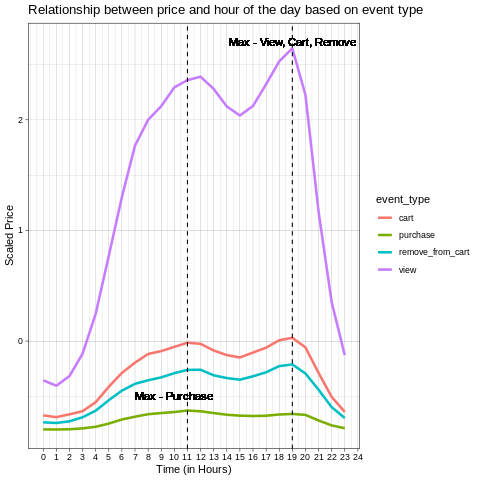

In [ ]:
%%R
# Price vs hour categorized by event type 

t1 <- sample_2019_oct %>% select(price, event_time, event_type)
t1$hour <- hour(t1$event_time)
t2 <- sample_2019_nov %>% select(price, event_time, event_type)
t2$hour <- hour(t2$event_time)
t3 <- sample_2019_dec %>% select(price, event_time, event_type)
t3$hour <- hour(t3$event_time)
t4 <- sample_2020_jan %>% select(price, event_time, event_type)
t4$hour <- hour(t4$event_time)
t5 <- sample_2020_feb %>% select(price, event_time, event_type)
t5$hour <- hour(t5$event_time)
time <- rbind(t1,t2,t3,t4,t5)
time_hour <- aggregate(price ~ event_type + hour, time, sum)
head(time_hour)

options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(data = time_hour, mapping = aes(x = hour, y = scale(price))) + geom_line(mapping = aes(color = event_type), lwd = 1.2) + theme_linedraw() + ggtitle("Relationship between price and hour of the day based on event type") + xlab("Time (in Hours)") + ylab("Scaled Price") +  geom_vline(mapping = aes(xintercept = 19), linetype = "dashed", color = "black") +  geom_vline(mapping = aes(xintercept = 11), linetype = "dashed", color = "black") +  geom_text(mapping = aes(x = 10, y = -0.5), label = "Max - Purchase") + geom_text(mapping = aes(x = 19, y = 2.7), label = "Max - View, Cart, Remove") + scale_x_continuous(breaks = c(0:24))

**Recommendation 3**: With respect to price, compelling discountings can be
offered at crucial times such as 11am to increase the website traffic during working hours of the day. Time based promotional events can take full advantage of the time and price impact of our analysis.

**Recommendation 4**: Treat each of this funneling process with different marketing techniques and models specific to them to ensure new customers come in and they don’t leave after a short period. Additionally to instill a loyalty program given the repeated purchasing power.
